In [1]:
#import statements
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
import numpy as np
import cv2
import glob
#load data_set images of vehicles and Non-Vehicles
car_images = glob.glob('Data_set/vehicles/vehicles/**/*.png')
noncar_images = glob.glob('Data_set/non-vehicles/non-vehicles/**/*.png')
print("Number of Vehicle images in data_set=  "+str(len(car_images)))
print("Number of Vehicle images in data_set=  "+str(len(noncar_images)))
      

Number of Vehicle images in data_set=  8792
Number of Vehicle images in data_set=  8968



              ****************************** DATA SET SAMPLE VISUALIZATION:*****************************



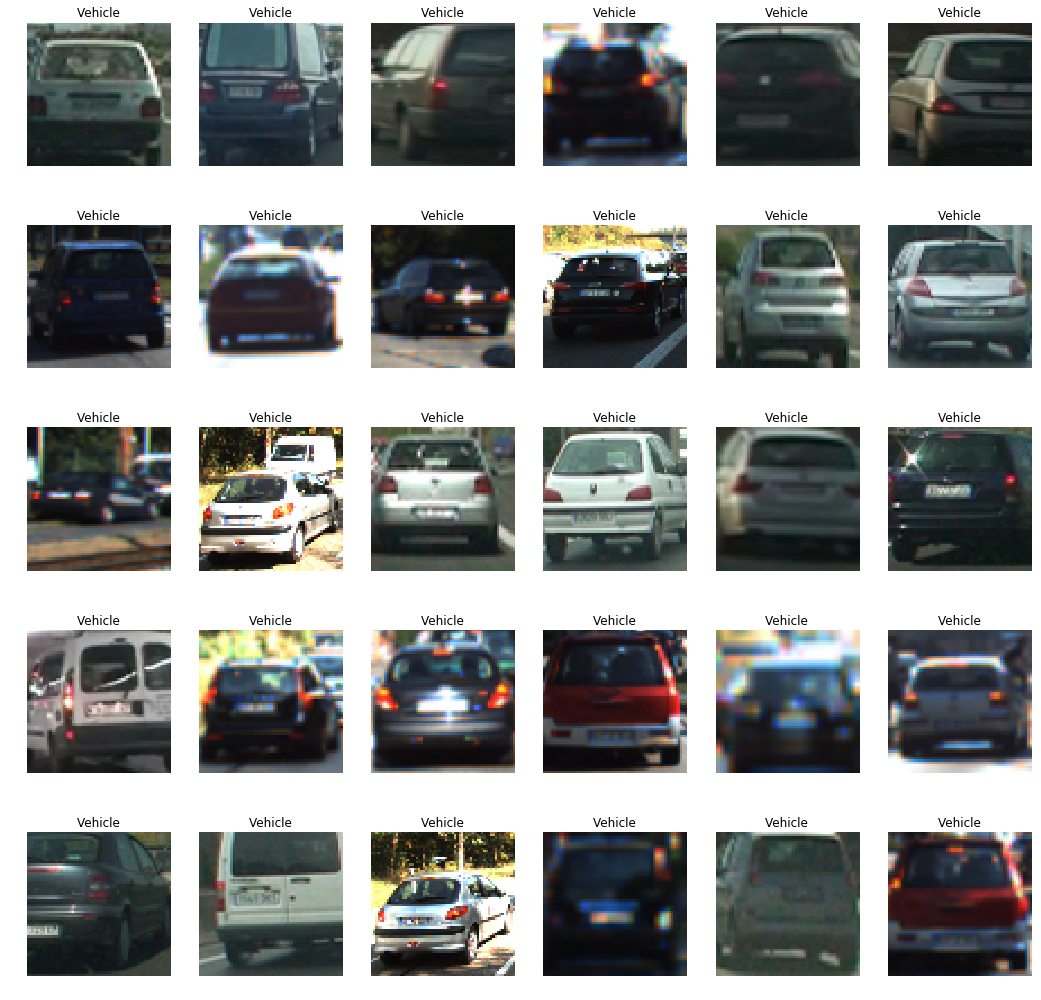

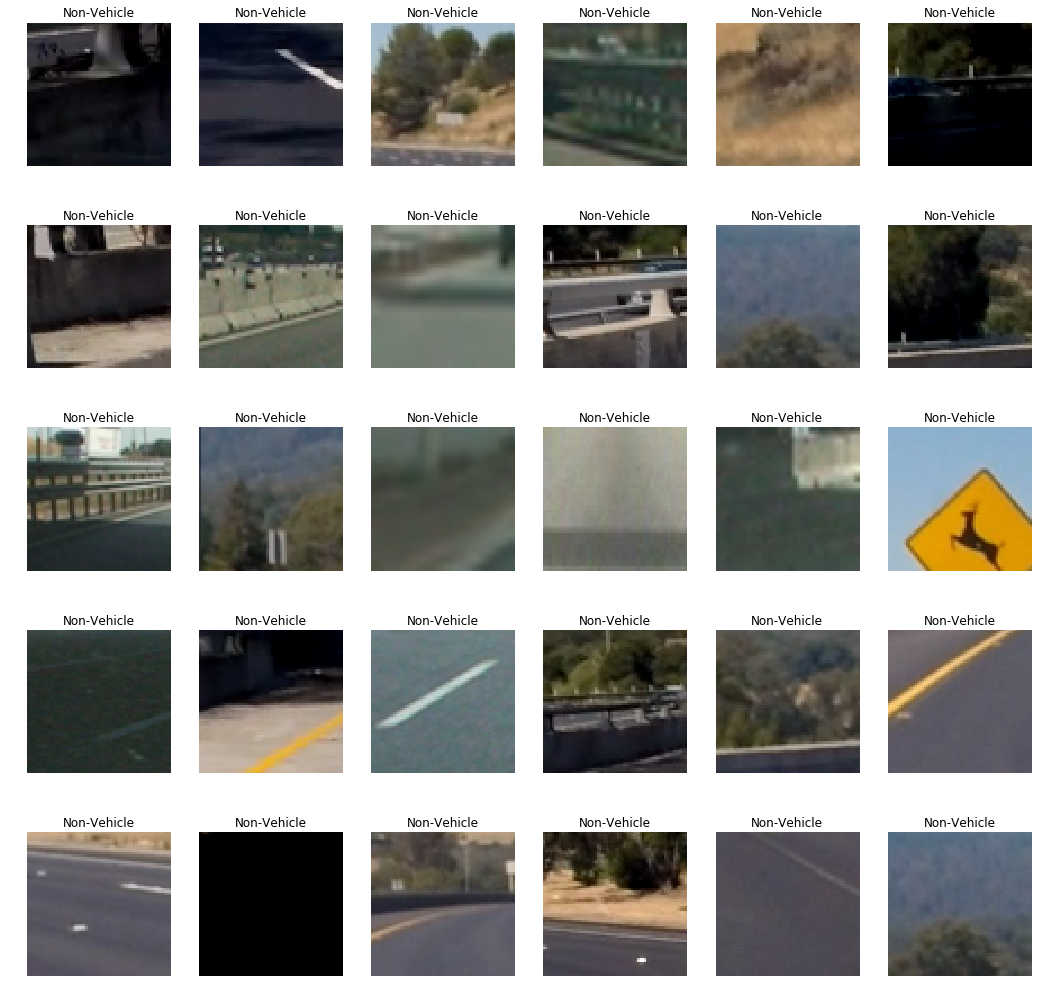

In [2]:
#visualize data_set
#randomly Visualize the vehicle and Non_Vehicle Images from the data_set

plt.figure(figsize=(18, 18))

index=0
for i in range(0, 30):
    plt.subplot(5, 6, i+1)
    img = cv2.imread(car_images[np.random.randint(0,len(car_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img) #draw the image 
    plt.title("Vehicle")
    plt.axis('off')
    index=index+1

print("\n              ****************************** DATA SET SAMPLE VISUALIZATION:*****************************\n")
plt.show()



index=0
plt.figure(figsize=(18, 18))    

for i in range(0, 30):
    plt.subplot(5, 6, i+1)
    img = cv2.imread(noncar_images[np.random.randint(0,len(car_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img) #draw the image 
    plt.title("Non-Vehicle")
    plt.axis('off')
    index=index+1

plt.show()





C:\Users\raghavender.yadagiri\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


car hog_viz shape= (64, 64)
car_img= (64, 64, 3)


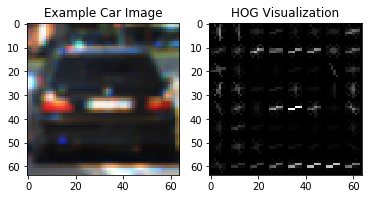

car hog_viz shape= (64, 64)
car_img= (64, 64, 3)


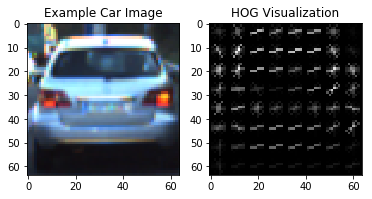

car hog_viz shape= (64, 64)
car_img= (64, 64, 3)


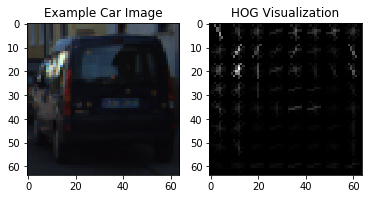

car hog_viz shape= (64, 64)
car_img= (64, 64, 3)


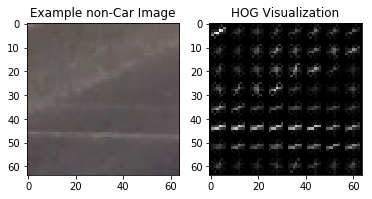

car hog_viz shape= (64, 64)
car_img= (64, 64, 3)


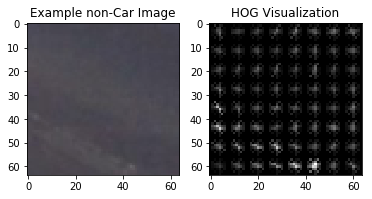

car hog_viz shape= (64, 64)
car_img= (64, 64, 3)


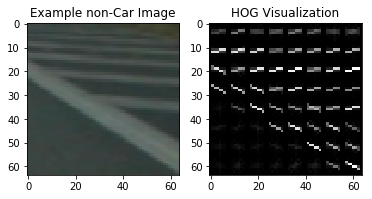

In [3]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features



def get_hog_viz(image_file_name):   
    car_img = mpimg.imread(image_file_name)
    _, car_hog_viz = get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
    return car_img,car_hog_viz
    

    fig = plt.figure()
def vizualize_image_hog(image_name,car_or_non_car):
    #plt.figure(figsize=(18, 18))   
    fig = plt.figure()
    car_img,car_hog_viz=get_hog_viz(image_name)
    print("car hog_viz shape=",car_hog_viz.shape)
    print("car_img=",car_img.shape)
    plt.subplot(121)
    plt.imshow(car_img, cmap='gray')
    if car_or_non_car == 1:
        plt.title('Example Car Image')
    else: 
        plt.title('Example non-Car Image')
    plt.subplot(122)
    plt.imshow(car_hog_viz, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()
    
    
for i in range(0,3):   
    vizualize_image_hog(car_images[np.random.randint(0,len(car_images))],1)
    
for i in range(0,3):   
    vizualize_image_hog(noncar_images[np.random.randint(0,len(car_images))],0)    


    
    


# Extract Features for Training Datasets and Define Labels Vector, Shuffle and Split into Training and Test sets

In [4]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    ch1 = np.histogram(img[:,:,0], bins=nbins, range=(0, 256))[0]#We need only the histogram, no bins edges
    ch2 = np.histogram(img[:,:,1], bins=nbins, range=(0, 256))[0]
    ch3 = np.histogram(img[:,:,2], bins=nbins, range=(0, 256))[0]
    hist = np.hstack((ch1, ch2, ch3))
    return hist

    '''# Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features'''
def extract_features(imgs, cspace, orient, 
                        pix_per_cell, cell_per_block):
    # Create a list to append feature vectors to
    features = []
    spatial_size = (16, 16)
    hist_bins = 16    # Number of histogram bins
    n_channel='ALL'
    color_space='YUV'
    # Iterate through the list of images
    print("Number of images="+str(len(imgs)))
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
               #feature_image=np.copy(image)
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: 
            feature_image = np.copy(image)  
            
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        file_features.append(spatial_features)
        
        
            # Apply color_hist()
        hist_features = color_hist(feature_image, nbins=hist_bins)
        file_features.append(hist_features)
        
             
        hog_features = []
        if n_channel=='ALL':
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                            orient, pix_per_cell, cell_per_block, 
                                            vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)
        else:
            #feature_image = cv2.cvtColor(feature_image, cv2.COLOR_LUV2RGB)
            feature_image = cv2.cvtColor(feature_image, cv2.COLOR_RGB2GRAY)
            hog_features.append(get_hog_features(feature_image[:,:], 
                                            orient, pix_per_cell, cell_per_block, 
                                            vis=False, feature_vec=True))
            
         
        
        file_features.append(hog_features)
        features.append(np.concatenate(file_features))
        
    # Return list of feature vectors
    return features





def single_img_features(img, color_space,
                        orient, 
                        pix_per_cell, cell_per_block
                        ):    
    #1) Define an empty list to receive features
    img_features = []
    spatial_size = (16, 16)
    hist_bins = 16    # Number of histogram bins
    hog_channel='ALL'
    color_spae='YUV'
    spatial_feat=True
    hist_feat=True
    hog_feat=True
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            #feature_image=np.copy(img)
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        hog_features = []
        if hog_channel == 'ALL':
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            feature_image = cv2.cvtColor(feature_image, cv2.COLOR_LUV2RGB)
            feature_image = cv2.cvtColor(feature_image, cv2.COLOR_RGB2GRAY)
            hog_features.append(get_hog_features(feature_image[:,:], 
                                            orient, pix_per_cell, cell_per_block, 
                                            vis=False, feature_vec=True))
           
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)


In [5]:
#Extract Features from Input Datasets,Define Labels Vector, Shuffle and 

import time 

color_space='YUV'
orient = 11
pix_per_cell = 16
cell_per_block = 2
features_from_file=0
if features_from_file==1:
    t = time.time()
    car_features = extract_features(car_images,color_space, orient, 
                            pix_per_cell, cell_per_block)
    notcar_features = extract_features(noncar_images, color_space, orient, 
                            pix_per_cell, cell_per_block)
    t2 = time.time()
    print('Time take to extract HOG features= ',round(t2-t, 2))
    print("Extracted at =",time.ctime())


In [6]:
import pickle
if features_from_file==1:
    features_pickle={}
    features_pickle["car_features"]=car_features
    features_pickle["notcar_features"]=notcar_features
    features_pickle["car_images"]=car_images
    features_pickle["noncar_images"]=noncar_images
    pickle.dump( features_pickle, open( "features_pickle.p", "wb" ) )
    print("data_pickled successfuly!")

In [7]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import time 

if features_from_file==0:
    load_from_pickle=1
else:
    load_from_pickle=0
    
if load_from_pickle==1:
    features_pickle=pickle.load(open( "features_pickle.p", "rb" ))
    car_features=features_pickle["car_features"]
    notcar_features=features_pickle["notcar_features"]
    car_images=features_pickle["car_images"]
    noncar_images=features_pickle["noncar_images"]
    #Create the array of features and lables 

X = np.vstack((car_features, notcar_features)).astype(np.float64)  

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))



# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)


#HOG parameters 
print('\nOrientation=',orient,'\nPixcels Per cell=',pix_per_cell,
    '\nCells per block=', cell_per_block)
print('\nEach X Feature length:', len(X_train[0]))


Orientation= 11 
Pixcels Per cell= 16 
Cells per block= 2

Each X Feature length: 2004


# SVM Training and Testing 

In [8]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

#Linear Support Vector Classification
svc = LinearSVC()

svc.fit(X_train, y_train)
Test_Accuracy=svc.score(X_test, y_test)
print('Test Accuracy of SVC = ', Test_Accuracy)

Test Accuracy of SVC =  0.982826576577


C:\Users\raghavender.yadagiri\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Number of hot Windows= 3


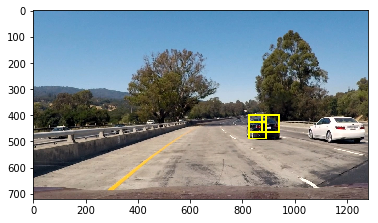

Number of hot Windows= 0


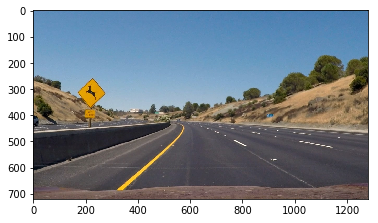

Number of hot Windows= 0


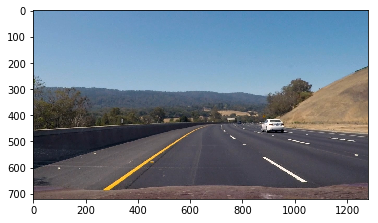

Number of hot Windows= 2


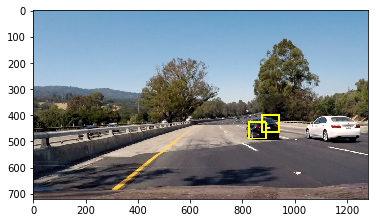

Number of hot Windows= 5


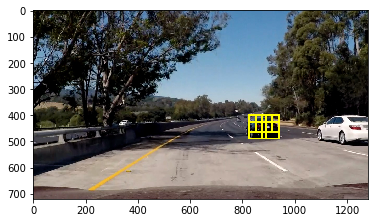

Number of hot Windows= 4


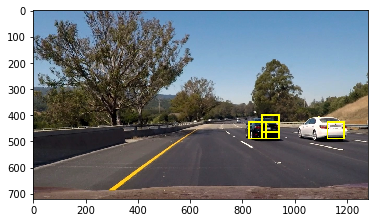

In [9]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6,random_Color=1):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        #print("drawing box!")
        if random_Color==1:
            color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
        else:
            cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window( pix_per_cell, cell_per_block,orient,img,x_start,x_stop, y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    x_start_stop = [0,0]
    x_start_stop[0] = x_start
    x_start_stop[1] = x_stop
    #print("Sliding window  x_start and x_stop=",x_start,x_stop)    
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    

        
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            roi = img[starty:endy, startx:endx]
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


# Define a function you will pass an image 

def search_windows( img, windows, clf, color_space, orient, 
                    pix_per_cell, cell_per_block, scaler):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in? the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        #4) Extract features for that window using single_img_features()
        features=single_img_features(test_img,color_space, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))        
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

def find_cars_hot_windows(pix_per_cell, cell_per_block,orient,image, svc,color_space,X_scalar
                          ,ystart, ystop,x_start,x_stop, 
                    xy_window=(64, 64), xy_overlap=(0.6, 0.6)):
    #print("Finding cars_hot windows  x_start and x_stop=",x_start,x_stop)
    windows = slide_window(pix_per_cell, cell_per_block,orient,image,x_start,x_stop,
                           y_start_stop=(ystart,ystop),
                           xy_window=xy_window, xy_overlap=xy_overlap)
    
    hot_windows = search_windows(image, windows, svc, color_space,  
                        orient, pix_per_cell, 
                        cell_per_block,X_scaler)  
    return hot_windows,windows



orient = 11
pix_per_cell = 16
cell_per_block = 2
color_space = 'YUV'
Ystart = 400
ystop = 656
y_start_stop=(400,656)
start=400
stop=656
x_start=0
x_stop=1250
t=time.time() # Start time
for image_name in glob.glob('./test_images/test*.jpg'):
    image = mpimg.imread(image_name)
    draw_image = np.copy(image)
    image = image.astype(np.float32)/255
    
    
    

    
    hot_windows,windows=find_cars_hot_windows(pix_per_cell, cell_per_block,orient,image, svc,color_space,X_scaler
                                   ,start,stop,x_start,x_stop,xy_window=(64, 64), xy_overlap=(0.6, 0.6))
    
    print("Number of hot Windows=",len(hot_windows))
    window_img = draw_boxes(draw_image, hot_windows, color=(255, 255, 0), thick=6,random_Color=0)                     
    plt.imshow(window_img)
    plt.show()


    


    
    


In [10]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    # Return thresholded map
    return heatmap


def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (255,255,0), 6)
    # Return the image
    return img



## Combine Various Sliding Window Searches

In [11]:
from collections import deque
Heat_map_que = deque(maxlen = 8)
print("Heat_map_que size=",len(Heat_map_que))

Heat_map_que size= 0


C:\Users\raghavender.yadagiri\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


All windows_in_images


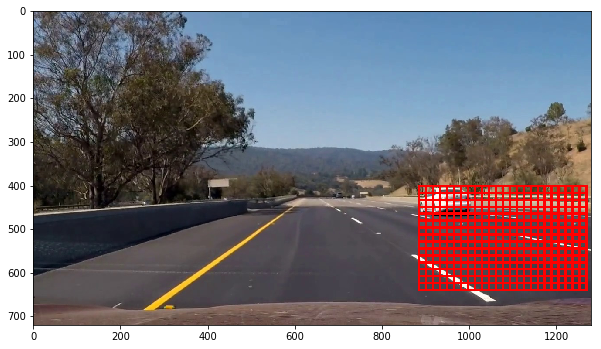

All windows_in_images


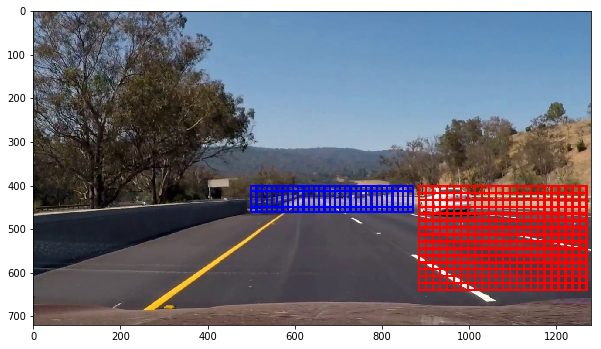

All windows_in_images


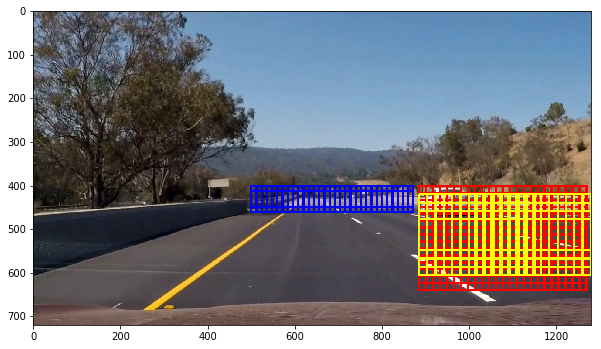

Hot_windows_in_images


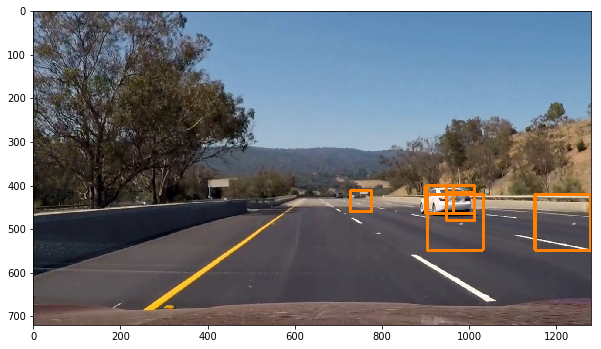

heat_map


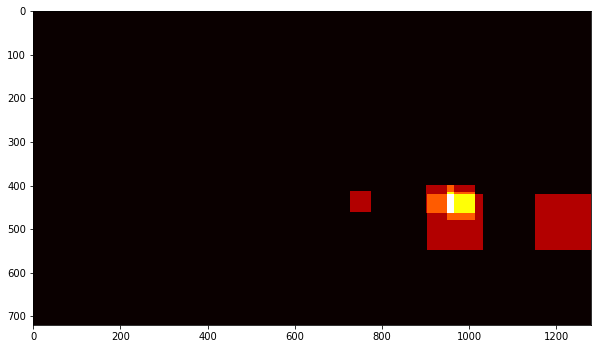

Filtered heat_map


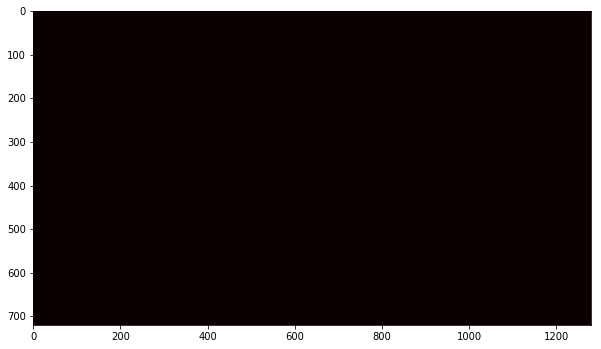

Labled heat_map


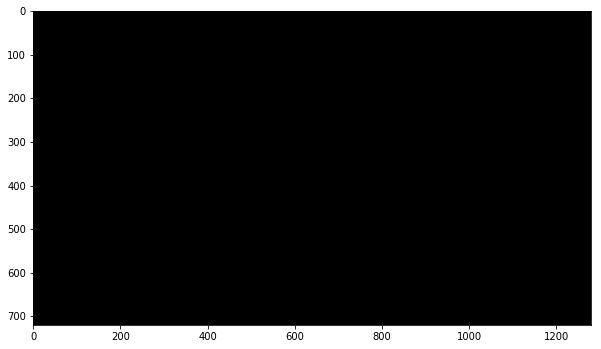

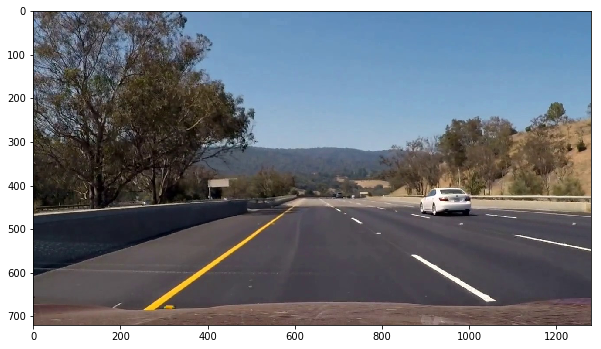

In [12]:



def find_Car_in_image(image,display_pipeline):
    history = deque(maxlen = 8)
    orient = 11
    pix_per_cell = 16
    cell_per_block = 2
    color_space='YUV'
    Combine_hot_windows = []
    Combined_windows = []   
    draw_image = np.copy(image)
    image = image.astype(np.float32)/255
    

    draw_image1 = np.copy(image)
    #Sliding windows iteration 1
    ystart = 420
    ystop = 620
    x_start=885
    x_stop=1280
    scale=2
    xy_window=(64*scale,64*scale)
    hot_windows,windows=find_cars_hot_windows(pix_per_cell, cell_per_block,orient,image, 
                        svc,color_space,X_scaler ,ystart,ystop,x_start,x_stop, 
                        xy_window=xy_window, xy_overlap=(0.85, 0.85))
    Combine_hot_windows.extend(hot_windows)
    Combined_windows.extend(windows)
    
  
    #Sliding windows iteration 2
    ystart = 400
    ystop = 650
    x_start=885
    x_stop=1280
    scale=1
    xy_window=(64*scale,64*scale)
    hot_windows,windows1=find_cars_hot_windows(pix_per_cell, cell_per_block,orient,image, 
                        svc,color_space,X_scaler ,ystart,ystop,x_start,x_stop, 
                        xy_window=xy_window, xy_overlap=(0.75, 0.75))
    Combine_hot_windows.extend(hot_windows)
    Combined_windows.extend(windows)
    
    
    
    ystart = 400
    ystop = 470
    x_start=500
    x_stop=880
    scale=1
    xy_window=(48*scale,48*scale)
    hot_windows,windows2=find_cars_hot_windows(pix_per_cell, cell_per_block,orient,image, 
                        svc,color_space,X_scaler ,ystart,ystop,x_start,x_stop, 
                        xy_window=xy_window, xy_overlap=(0.75, 0.75))
    Combine_hot_windows.extend(hot_windows)
    Combined_windows.extend(windows)
    
    window_img = draw_boxes(draw_image,windows1, color=(255, 0, 0), thick=4,random_Color=0)
    if display_pipeline == 1:
        print("All windows_in_images")
        plt.figure(figsize=(10,10))
        plt.imshow(window_img)
        plt.show()
     
    window_img = draw_boxes(window_img,windows2, color=(0, 0, 255), thick=4,random_Color=0)
    if display_pipeline == 1:
        print("All windows_in_images")
        plt.figure(figsize=(10,10))
        plt.imshow(window_img)
        plt.show()
        
    window_img = draw_boxes(window_img,Combined_windows, color=(255, 255, 0), thick=4,random_Color=0)
    if display_pipeline == 1:
        print("All windows_in_images")
        plt.figure(figsize=(10,10))
        plt.imshow(window_img)
        plt.show()
        
        

        
    
    window_img = draw_boxes(draw_image, Combine_hot_windows, color=(255, 128,0), thick=6,random_Color=0)
    if display_pipeline == 1:
        print("Hot_windows_in_images")
        plt.figure(figsize=(10,10))
        plt.imshow(window_img)
        plt.show()
    
    # Test out the heatmap
    heatmap_img = np.zeros_like(draw_image[:,:,0])
    Accum_heat_img = np.zeros_like(draw_image[:,:,0])
    

    
    heatmap_img = add_heat(heatmap_img, Combine_hot_windows)
    #Check if the que is already full
    if(len(Heat_map_que)==Heat_map_que.maxlen):
        Heat_map_que.popleft()#Pop the oldest element
    
    Heat_map_que.append(heatmap_img)
    count=0
    #add Current Heatmap to the que
    for count in range(0,len(Heat_map_que)):
        Accum_heat_img=Accum_heat_img+Heat_map_que[count]
            
        
    if display_pipeline == 1:
        print("heat_map")
        plt.figure(figsize=(10,10))
        plt.imshow(Accum_heat_img, cmap='hot')
        plt.show()
    #Apply Treshold to the image***********************    
    heatmap_trsh_img = apply_threshold(Accum_heat_img, 7)
    if display_pipeline == 1:
        print("Filtered heat_map")
        plt.figure(figsize=(10,10))
        plt.imshow(heatmap_trsh_img, cmap='hot')
        plt.show()

    labels = label(heatmap_trsh_img)
    if display_pipeline == 1:
        print("Labled heat_map")
        plt.figure(figsize=(10,10))
        plt.imshow(labels[0], cmap='gray')
        plt.show()


    draw_img = draw_labeled_bboxes(draw_image, labels)
    # Display the image
    #plt.figure(figsize=(10,10))
    #plt.imshow(draw_img)
    #plt.show()
    return draw_img

image = mpimg.imread('./test_images/raghu2.jpg')
#image = image.astype(np.float32)/255
Heat_map_que.clear()
draw_image = find_Car_in_image(np.copy(image),1)
plt.figure(figsize=(10,10))
plt.imshow(draw_image)
plt.show()




In [13]:
from moviepy.editor import VideoFileClip
import time 
def process_image(image):
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    result_image=find_Car_in_image(np.copy(image),0)
    return(result_image)
    #return result_image
"""    
test_out_file2 = 'test_video_out.mp4'
clip_test2 = VideoFileClip('test_video.mp4')
clip_test_out2 = clip_test2.fl_image(process_image)
%time clip_test_out2.write_videofile(test_out_file2, audio=False)
print(time.ctime()) """

"    \ntest_out_file2 = 'test_video_out.mp4'\nclip_test2 = VideoFileClip('test_video.mp4')\nclip_test_out2 = clip_test2.fl_image(process_image)\n%time clip_test_out2.write_videofile(test_out_file2, audio=False)\nprint(time.ctime()) "

## Process the image

In [14]:
from moviepy.editor import VideoFileClip
import time 
Heat_map_que.clear()
test_out_file2 = 'project_part_video_out.mp4'
clip_test2 = VideoFileClip('project_video_part1.mp4')
clip_test_out2 = clip_test2.fl_image(process_image)
%time clip_test_out2.write_videofile(test_out_file2, audio=False)
print(time.ctime())

[MoviePy] >>>> Building video project_part_video_out.mp4
[MoviePy] Writing video project_part_video_out.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [07:25<00:00,  1.05s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_part_video_out.mp4 

Wall time: 7min 26s
Sat Feb 10 21:22:53 2018


In [15]:

from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('project_part_video_out.mp4'))

In [16]:
from moviepy.editor import VideoFileClip
import time 
myclip = VideoFileClip("project_video.mp4")
print (myclip.fps) # prints for instance '30'
# Now cut the clip between t=10 and 25 secs. This conserves the fps.
myclip2 = myclip.subclip(10, 25)
myclip2.write_videofile("project_video_part1.mp4") # the gif will have 30 fps
print(time.ctime())

25.0
[MoviePy] >>>> Building video project_video_part1.mp4
[MoviePy] Writing audio in project_video_part1TEMP_MPY_wvf_snd.mp3



100%|██████████████████████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 1457.20it/s]

[MoviePy] Done.
[MoviePy] Writing video project_video_part1.mp4



100%|███████████████████████████████████████████████████████████████████████████████▊| 375/376 [00:06<00:00, 44.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_part1.mp4 

Sat Feb 10 20:23:28 2018


In [ ]:
from moviepy.editor import VideoFileClip
import time 
Heat_map_que.clear()
test_out_file2 = 'project_video_master_out.mp4'
clip_test2 = VideoFileClip('project_video.mp4')
clip_test_out2 = clip_test2.fl_image(process_image)
%time clip_test_out2.write_videofile(test_out_file2, audio=False)
print(time.ctime())

[MoviePy] >>>> Building video project_video_master_out.mp4
[MoviePy] Writing video project_video_master_out.mp4


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [22:13<00:08,  1.06s/it]

In [19]:
from moviepy.editor import VideoFileClip
import time 
Heat_map_que.clear()
test_out_file2 = 'project_video_out.mp4'
clip_test2 = VideoFileClip('project_video.mp4')
clip_test_out2 = clip_test2.fl_image(process_image)
%time clip_test_out2.write_videofile(test_out_file2, audio=False)
print(time.ctime())

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


  2%|█▍                                                                              | 22/1261 [00:16<14:48,  1.39it/s]

KeyboardInterrupt: 

Sat Feb 10 19:46:58 2018


In [17]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('project_video_out_1.mp4'))